In [1]:
import numpy as np
import pandas as pd
import sklearn as sns
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
file_name= "digit-recognizer.zip"

with ZipFile(file_name,"r") as zip:
    print("extracting..")
    zip.printdir()
    
    
    zip.extractall()
    print("done.")

extracting..
File Name                                             Modified             Size
sample_submission.csv                          2019-12-11 20:01:20       240909
test.csv                                       2019-12-11 20:01:20     51118296
train.csv                                      2019-12-11 20:01:24     76775041
done.


In [3]:
test_data= pd.read_csv("test.csv")
train_data= pd.read_csv("train.csv")

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
test_data.shape

(28000, 784)

In [7]:
train_data.shape

(42000, 785)

In [8]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


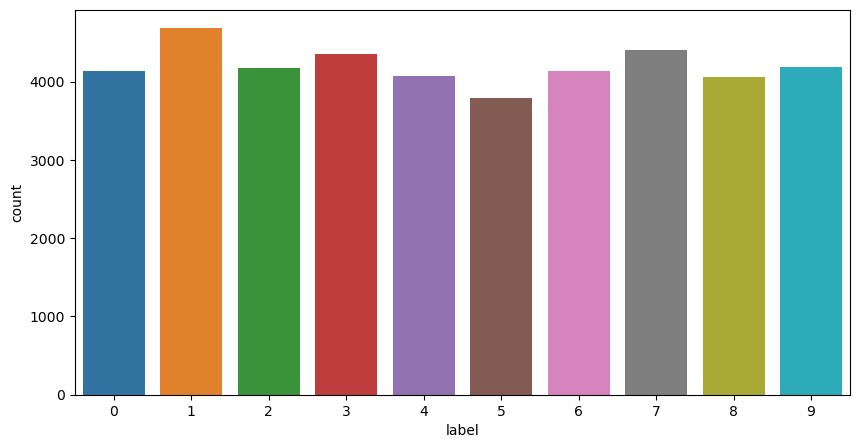

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_data['label'])
plt.show()
#label== output

In [10]:
x_train= train_data.drop(["label"], axis=1)
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y_train=train_data["label"]
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

### DATA PREPROCESSING

In [16]:
from keras.utils.np_utils import to_categorical
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D

In [17]:
y_train= to_categorical(y_train, num_classes=10)

In [18]:
x_train= x_train.values.reshape(-1,28,28,1)
x_train= x_train/255.0

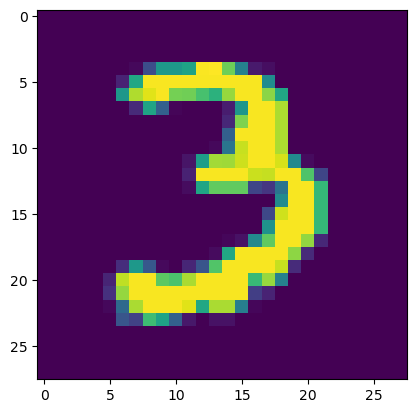

In [21]:
plt.imshow(x_train[9][:,:,0])
plt.show()

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        